# Reinforcement Learning
Let's describe a taxi problem. We want to build a self driving taxi that can pick up passengers at one of a set
of fixed locations, drop them off at another location, and get there in quickest amount of time while avoiding
obstacles.
The AI gym let us create that environment quickly.

In [40]:
# import necessary libraries
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [46]:
# Initialize Environment and Agent Parameters
env = gym.make("Taxi-v3", render_mode='ansi')

q_table = np.zeros([env.observation_space.n, env.action_space.n])

# hyperparameters
alpha = 0.7   # learning rate
gamma = 0.618 # Discount factor
epsilon = 1.0 # exploration rate
epsilon_decay = 0.01
min_epsilon = 0.1
episodes = 10000

# stats
all_epochs = []
all_penalties = []

In [47]:
# Q learning Algorithm (Training Loop) - Epsilon Greedy Strategy
for episode in range(episodes):
    state, _ = env.reset()
    epochs, penalties, reward = 0,0,0
    done = False
    while not done:
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # explore
        else:
            action = np.argmax(q_table[state]) # exploit
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state,action] = old_value + alpha * (reward + gamma * next_max - old_value)
        if reward == -10:
            penalties += 1
        state = next_state
        epochs += 1
    epsilon = max(min_epsilon, epsilon - epsilon_decay)
    all_epochs.append(epochs)
    all_penalties.append(penalties)
    if (episode + 1) % 1000 == 0:
        print(f"Episode: {episode + 1}")

Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000


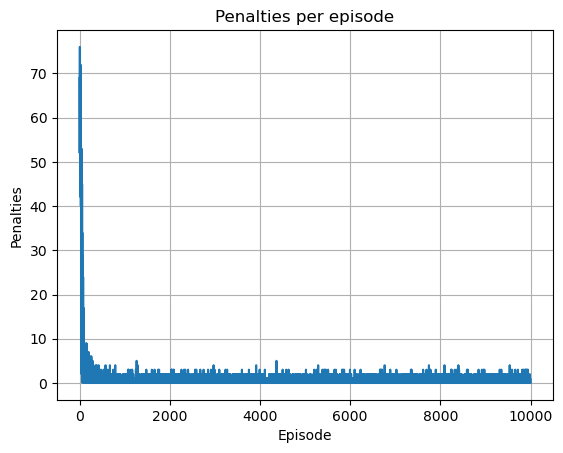

In [43]:
# Visuaize Training set
plt.plot(all_penalties)
plt.title("Penalties per episode")
plt.xlabel("Episode")
plt.ylabel("Penalties")
plt.grid(True)
plt.show()

In [44]:
# Evaluate the trained model
total_epochs, total_penalties = 0,0 
episodes = 100

for _ in range(episodes):
    state, _ = env.reset()
    done = False
    epochs, penalties = 0,0 

    while not done:
        action = np.argmax(q_table[state])
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        if reward == -10:
            penalties += 1
        epochs += 1
    total_penalties += penalties
    total_epochs += epochs

print(f"results after {episode} episodes: ")
print(f" Average timestep per episode: {total_epochs / episodes}")
print(f" Average penalties per episode: {total_penalties / episodes}")

results after 9999 episodes: 
 Average timestep per episode: 13.17
 Average penalties per episode: 0.0


In [48]:
# Render one episode (Animation)
state, _ =  env.reset()
done  =  False

while not done:
    clear_output(wait=True)
    print(env.render())
    action = np.argmax(q_table[state])
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    time.sleep(0.5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)



In [ ]:
# save q table
import pickle
with open("q_table.pkl", "wb") as f:
    pickle.dump(q_table,f)